<a href="https://colab.research.google.com/github/sasireddyvari/Income_Class_Prediction/blob/master/Income_Class_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/data_practice/deloite/data_delottie.csv')

In [ ]:
data

,Unnamed: 0,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K
1,1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,NaN,Husband,Male,0.0,0.0,13.0,United-States,<=50K
2,2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K
3,3,53.0,Private,NaN,NaN,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,<=50K
4,4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40930,16276,39.0,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,Female,0.0,0.0,36.0,United-States,<=50K.
40931,16277,64.0,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Male,0.0,0.0,40.0,United-States,<=50K.
40932,16278,38.0,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,Male,0.0,0.0,50.0,United-States,<=50K.
40933,16279,44.0,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Male,5455.0,0.0,40.0,United-States,<=50K.


In [ ]:
data.dtypes

Unnamed: 0         int64
Age              float64
WorkClass         object
fnlwgt           float64
Education         object
EducationNum     float64
MaritalStatus     object
Occupation        object
Relationship      object
Gender            object
CapitalGain      float64
CapitalLoss      float64
HoursPerWeek     float64
NativeCountry     object
Income            object
dtype: object

In [ ]:
data.isnull().sum()

Unnamed: 0          0
Age              2741
WorkClass        2789
fnlwgt           2786
Education        2743
EducationNum     2803
MaritalStatus    2924
Occupation       2759
Relationship     2815
Gender           2727
CapitalGain      2806
CapitalLoss      2718
HoursPerWeek     2680
NativeCountry    2729
Income              0
dtype: int64

In [ ]:
features_na=[feature for feature in data.columns if data[feature].isnull().sum()>1]
features_na

['Age',
 'WorkClass',
 'fnlwgt',
 'Education',
 'EducationNum',
 'MaritalStatus',
 'Occupation',
 'Relationship',
 'Gender',
 'CapitalGain',
 'CapitalLoss',
 'HoursPerWeek',
 'NativeCountry']

In [ ]:
for feature in features_na:
  print(feature, np.round(data[feature].isnull().mean() * 100, 4),  ' % missing values')

Age 6.696  % missing values
WorkClass 6.8132  % missing values
fnlwgt 6.8059  % missing values
Education 6.7009  % missing values
EducationNum 6.8474  % missing values
MaritalStatus 7.143  % missing values
Occupation 6.74  % missing values
Relationship 6.8768  % missing values
Gender 6.6618  % missing values
CapitalGain 6.8548  % missing values
CapitalLoss 6.6398  % missing values
HoursPerWeek 6.547  % missing values
NativeCountry 6.6667  % missing values


In [ ]:
# From above we can observe apart from Income variable all other variables contains NaN values and its 6% hence it should be filled 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40935 entries, 0 to 40934
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     40935 non-null  int64  
 1   Age            38194 non-null  float64
 2   WorkClass      38146 non-null  object 
 3   fnlwgt         38149 non-null  float64
 4   Education      38192 non-null  object 
 5   EducationNum   38132 non-null  float64
 6   MaritalStatus  38011 non-null  object 
 7   Occupation     38176 non-null  object 
 8   Relationship   38120 non-null  object 
 9   Gender         38208 non-null  object 
 10  CapitalGain    38129 non-null  float64
 11  CapitalLoss    38217 non-null  float64
 12  HoursPerWeek   38255 non-null  float64
 13  NativeCountry  38206 non-null  object 
 14  Income         40935 non-null  object 
dtypes: float64(6), int64(1), object(8)
memory usage: 4.7+ MB


In [ ]:
#Checking for Duplicate rows 

In [ ]:
temp_data=data.append(data)

In [ ]:
temp_data.shape

(81870, 15)

In [ ]:
temp_data.drop_duplicates(inplace=True)

In [ ]:
temp_data.shape

(40935, 15)

In [ ]:
#From above we can observer there are no Duplicate values available in data

In [ ]:
# Dropping column Unnamed as its not required since its unique values

In [ ]:
data.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
data

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,NaN,Husband,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,NaN,NaN,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40930,39.0,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,Female,0.0,0.0,36.0,United-States,<=50K.
40931,64.0,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Male,0.0,0.0,40.0,United-States,<=50K.
40932,38.0,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,Male,0.0,0.0,50.0,United-States,<=50K.
40933,44.0,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Male,5455.0,0.0,40.0,United-States,<=50K.


In [ ]:
data.describe() # From below we can observe that given data doensot conntains any negative values)

,Age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
count,38194.000000,3.814900e+04,38132.000000,38129.000000,38217.000000,38255.000000
mean,38.591585,1.898043e+05,10.080169,1076.079467,88.536934,40.407136
std,13.682749,1.059296e+05,2.570247,7440.867512,406.104097,12.432823
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.174440e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782510e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.378680e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
features_numeric=[feature for feature in data.columns if data[feature].dtypes!='O']
data[features_numeric].head()

,Age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
0,39.0,77516.0,13.0,2174.0,0.0,40.0
1,50.0,83311.0,13.0,0.0,0.0,13.0
2,38.0,215646.0,9.0,0.0,0.0,40.0
3,53.0,NaN,7.0,0.0,NaN,40.0
4,28.0,338409.0,13.0,0.0,0.0,40.0


In [ ]:
for feature in features_numeric:
  print(feature,"Mean:",data[feature].mean())

Age Mean: 38.591585065717126
fnlwgt Mean: 189804.29754384124
EducationNum Mean: 10.080168887024023
CapitalGain Mean: 1076.0794670723071
CapitalLoss Mean: 88.53693382526102
HoursPerWeek Mean: 40.4071363220494


In [ ]:
for feature in features_numeric:
  print(feature,"Median:",data[feature].median())

Age Median: 37.0
fnlwgt Median: 178251.0
EducationNum Median: 10.0
CapitalGain Median: 0.0
CapitalLoss Median: 0.0
HoursPerWeek Median: 40.0


In [ ]:
data['Income'] = data['Income'].str.strip() # Removes the White Spaces leading and trail

In [ ]:
data.shape

(40935, 14)

In [ ]:
data.Income.value_counts()

<=50K     21121
<=50K.    10002
>50K       6719
>50K.      3093
Name: Income, dtype: int64

In [ ]:
data.Income.replace({'<=50K.':'<=50K'},inplace=True)
data.Income.replace({'>50K.':'>50K'},inplace=True)
data.Income.value_counts()

<=50K    31123
>50K      9812
Name: Income, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


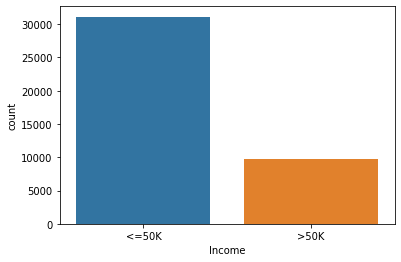

In [ ]:
sns.countplot(data.Income)

Age

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


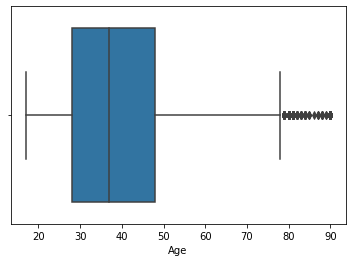

In [ ]:
sns.boxplot(data['Age'])

Filling NaN values for continuous variables with Mean Imputation

In [ ]:
data.shape

(40935, 14)

In [ ]:
for feature in features_numeric:
  data[feature].fillna(data[feature].mean(),inplace=True)

In [ ]:
data.isnull().sum()

Age                 0
WorkClass        2789
fnlwgt              0
Education        2743
EducationNum        0
MaritalStatus    2924
Occupation       2759
Relationship     2815
Gender           2727
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry    2729
Income              0
dtype: int64

In [ ]:
# Filled Numeric Variables

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40935 entries, 0 to 40934
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            40935 non-null  float64
 1   WorkClass      38146 non-null  object 
 2   fnlwgt         40935 non-null  float64
 3   Education      38192 non-null  object 
 4   EducationNum   40935 non-null  float64
 5   MaritalStatus  38011 non-null  object 
 6   Occupation     38176 non-null  object 
 7   Relationship   38120 non-null  object 
 8   Gender         38208 non-null  object 
 9   CapitalGain    40935 non-null  float64
 10  CapitalLoss    40935 non-null  float64
 11  HoursPerWeek   40935 non-null  float64
 12  NativeCountry  38206 non-null  object 
 13  Income         40935 non-null  object 
dtypes: float64(6), object(8)
memory usage: 4.4+ MB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


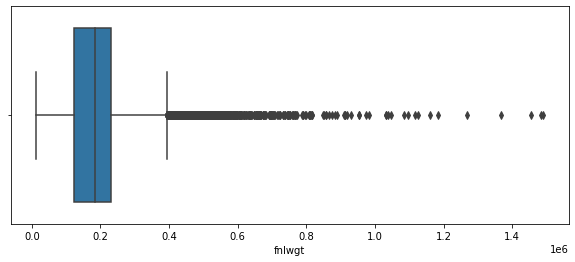

In [ ]:
plt.figure(figsize=[10,4])
sns.boxplot(data.fnlwgt)

In [ ]:
data.shape

(40935, 14)

In [ ]:
data = data[data.fnlwgt <800000]

In [ ]:
data.shape

(40896, 14)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


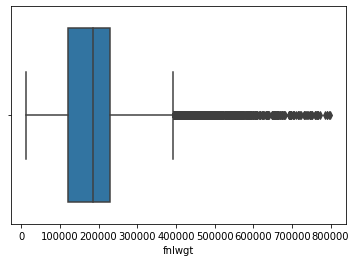

In [ ]:
sns.boxplot(data.fnlwgt)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


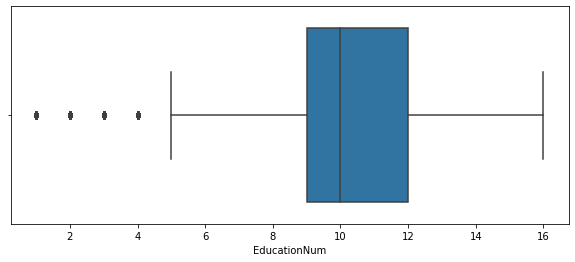

In [ ]:
plt.figure(figsize=[10,4])
sns.boxplot(data.EducationNum)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

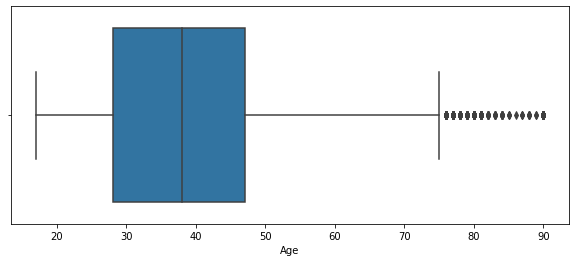

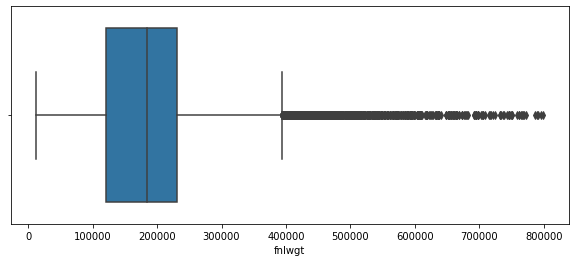

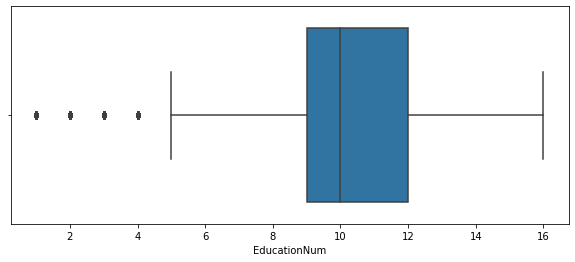

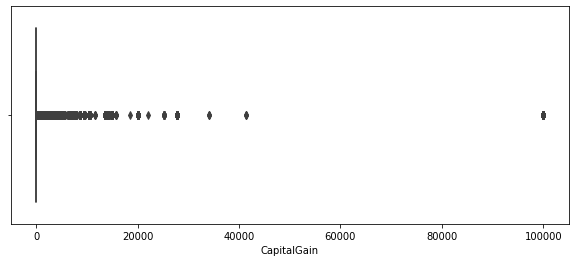

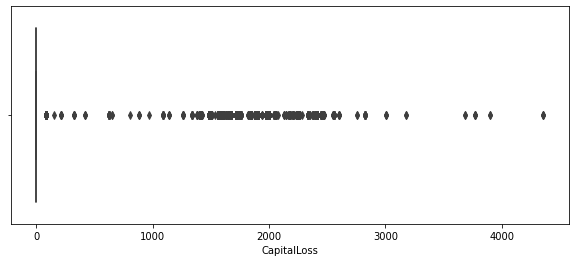

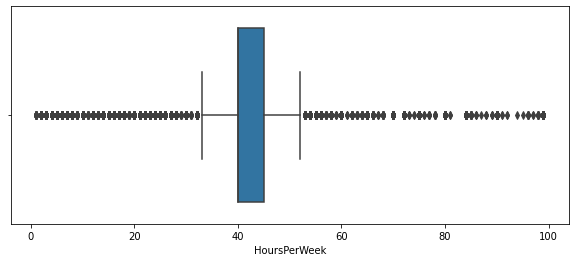

In [ ]:
for feature in features_numeric:
  plt.figure(figsize=[10,4])
  sns.boxplot(data[feature])

In [ ]:
data= data[data.CapitalGain <12000]

In [ ]:
data[features_numeric].isnull().sum()

Age             0
fnlwgt          0
EducationNum    0
CapitalGain     0
CapitalLoss     0
HoursPerWeek    0
dtype: int64

In [ ]:
data.shape

(40082, 14)

**Categorical Variables**

In [ ]:
features_categorical=[feature for feature in data.columns if data[feature].dtypes=='O']
data[features_categorical].head()

,WorkClass,Education,MaritalStatus,Occupation,Relationship,Gender,NativeCountry,Income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,NaN,Husband,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,United-States,<=50K
3,Private,NaN,Married-civ-spouse,Handlers-cleaners,Husband,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,NaN,Cuba,<=50K


In [ ]:
data.WorkClass.value_counts()

 Private             26031
 Self-emp-not-inc     2863
 Local-gov            2418
 ?                    2205
 State-gov            1525
 Self-emp-inc         1195
 Federal-gov          1083
 Without-pay            16
 Never-worked            9
Name: WorkClass, dtype: int64

In [ ]:
data['WorkClass'] = data['WorkClass'].str.strip()

In [ ]:
data.loc[data.WorkClass=='?',['WorkClass']]=np.NaN #Replacing ? with NaN values

In [ ]:
data.WorkClass.fillna('Private',inplace=True) # Replacing NAn with most accoured value
data.WorkClass.value_counts()

Private             30973
Self-emp-not-inc     2863
Local-gov            2418
State-gov            1525
Self-emp-inc         1195
Federal-gov          1083
Without-pay            16
Never-worked            9
Name: WorkClass, dtype: int64

In [ ]:
data.WorkClass.value_counts().sum()

40082

In [ ]:
data.shape

(40082, 14)

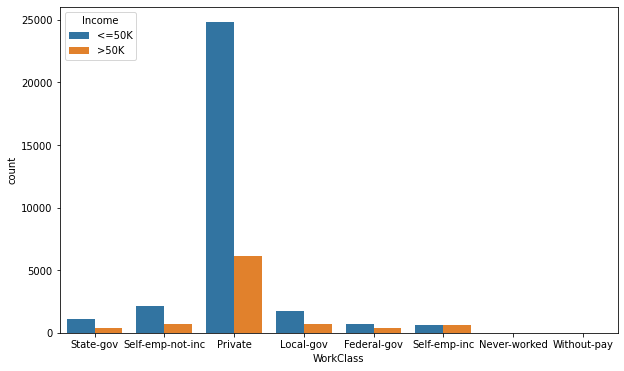

In [ ]:
plt.figure(figsize=[10,6])
sns.countplot(x="WorkClass",hue="Income",data=data)

Education

In [ ]:
data.Education.value_counts()

 HS-grad         12242
 Some-college     8418
 Bachelors        6001
 Masters          1979
 Assoc-voc        1600
 11th             1437
 Assoc-acdm       1238
 10th             1074
 7th-8th           735
 9th               596
 Prof-school       522
 12th              496
 Doctorate         416
 5th-6th           381
 1st-4th           195
 Preschool          62
Name: Education, dtype: int64

In [ ]:
data['Education'] = data['Education'].str.strip()

In [ ]:
data.shape

(40082, 14)

In [ ]:
data.Education.value_counts()

HS-grad         12242
Some-college     8418
Bachelors        6001
Masters          1979
Assoc-voc        1600
11th             1437
Assoc-acdm       1238
10th             1074
7th-8th           735
9th               596
Prof-school       522
12th              496
Doctorate         416
5th-6th           381
1st-4th           195
Preschool          62
Name: Education, dtype: int64

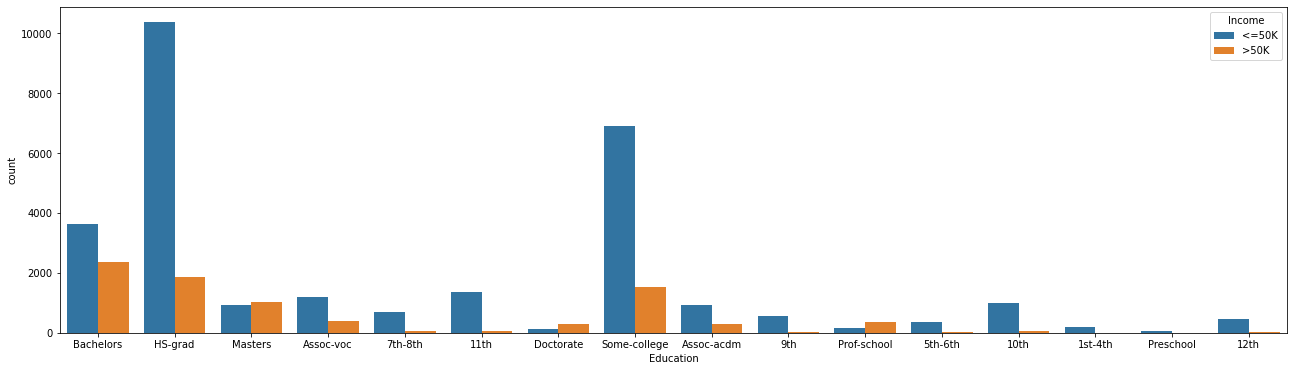

In [ ]:
plt.figure(figsize=[22,6])
sns.countplot(x="Education",hue="Income",data=data)

In [ ]:
data['Education'].replace('Preschool', 'Schooling',inplace=True)
data['Education'].replace('10th', 'Schooling',inplace=True)
data['Education'].replace('11th', 'Schooling',inplace=True)
data['Education'].replace('12th', 'Schooling',inplace=True)
data['Education'].replace('1st-4th', 'Schooling',inplace=True)
data['Education'].replace('5th-6th', 'Schooling',inplace=True)
data['Education'].replace('7th-8th', 'Schooling',inplace=True)
data['Education'].replace('9th', 'Schooling',inplace=True)
data['Education'].replace('HS-grad', 'HighGrad',inplace=True)
data['Education'].replace('Some-college', 'CommunityCollege',inplace=True)
data['Education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
data['Education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
data['Education'].replace('Bachelors', 'Bachelors',inplace=True)
data['Education'].replace('Masters', 'Masters',inplace=True)
data['Education'].replace('Prof-school', 'Masters',inplace=True)
data['Education'].replace('Doctorate', 'Doctorate',inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40082 entries, 0 to 40934
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            40082 non-null  float64
 1   WorkClass      40082 non-null  object 
 2   fnlwgt         40082 non-null  float64
 3   Education      37392 non-null  object 
 4   EducationNum   40082 non-null  float64
 5   MaritalStatus  37219 non-null  object 
 6   Occupation     37373 non-null  object 
 7   Relationship   37316 non-null  object 
 8   Gender         37406 non-null  object 
 9   CapitalGain    40082 non-null  float64
 10  CapitalLoss    40082 non-null  float64
 11  HoursPerWeek   40082 non-null  float64
 12  NativeCountry  37406 non-null  object 
 13  Income         40082 non-null  object 
dtypes: float64(6), object(8)
memory usage: 5.8+ MB


In [ ]:
data.Education.value_counts()

HighGrad            12242
CommunityCollege    11256
Bachelors            6001
Schooling            4976
Masters              2501
Doctorate             416
Name: Education, dtype: int64

In [ ]:
data.isnull().sum()

Age                 0
WorkClass           0
fnlwgt              0
Education        2690
EducationNum        0
MaritalStatus    2863
Occupation       2709
Relationship     2766
Gender           2676
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry    2676
Income              0
dtype: int64

In [ ]:
data.Education.fillna("HighGrad",inplace=True)

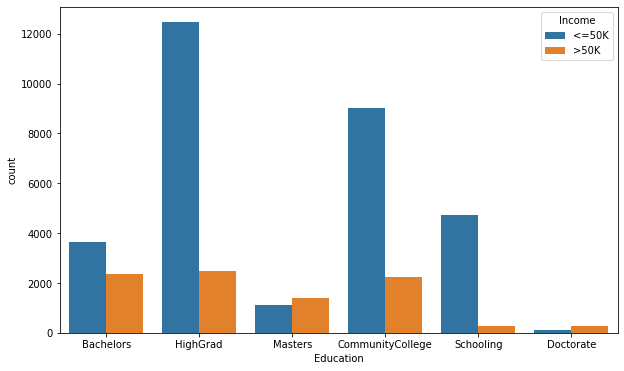

In [ ]:
plt.figure(figsize=[10,6])
sns.countplot(x="Education",hue="Income",data=data)

In [ ]:
data.isnull().sum()

Age                 0
WorkClass           0
fnlwgt              0
Education           0
EducationNum        0
MaritalStatus    2863
Occupation       2709
Relationship     2766
Gender           2676
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry    2676
Income              0
dtype: int64

MaritalStatus

In [ ]:
data.MaritalStatus.value_counts()

 Married-civ-spouse       16774
 Never-married            12561
 Divorced                  5019
 Widowed                   1190
 Separated                 1180
 Married-spouse-absent      466
 Married-AF-spouse           29
Name: MaritalStatus, dtype: int64

In [ ]:
data['MaritalStatus'] = data['MaritalStatus'].str.strip() 

In [ ]:
data.MaritalStatus.value_counts()

Married-civ-spouse       16774
Never-married            12561
Divorced                  5019
Widowed                   1190
Separated                 1180
Married-spouse-absent      466
Married-AF-spouse           29
Name: MaritalStatus, dtype: int64

In [ ]:
data['MaritalStatus'].replace('Never-married', 'NotMarried',inplace=True)
data['MaritalStatus'].replace(['Married-AF-spouse'], 'Married',inplace=True)
data['MaritalStatus'].replace(['Married-civ-spouse'], 'Married',inplace=True)
data['MaritalStatus'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
data['MaritalStatus'].replace(['Separated'], 'Separated',inplace=True)
data['MaritalStatus'].replace(['Divorced'], 'Separated',inplace=True)
data['MaritalStatus'].replace(['Widowed'], 'Widowed',inplace=True)

In [ ]:
data.MaritalStatus.value_counts()

Married       16803
NotMarried    13027
Separated      6199
Widowed        1190
Name: MaritalStatus, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40082 entries, 0 to 40934
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            40082 non-null  float64
 1   WorkClass      40082 non-null  object 
 2   fnlwgt         40082 non-null  float64
 3   Education      40082 non-null  object 
 4   EducationNum   40082 non-null  float64
 5   MaritalStatus  37219 non-null  object 
 6   Occupation     37373 non-null  object 
 7   Relationship   37316 non-null  object 
 8   Gender         37406 non-null  object 
 9   CapitalGain    40082 non-null  float64
 10  CapitalLoss    40082 non-null  float64
 11  HoursPerWeek   40082 non-null  float64
 12  NativeCountry  37406 non-null  object 
 13  Income         40082 non-null  object 
dtypes: float64(6), object(8)
memory usage: 5.8+ MB


In [ ]:
data.MaritalStatus.fillna("Married",inplace=True)

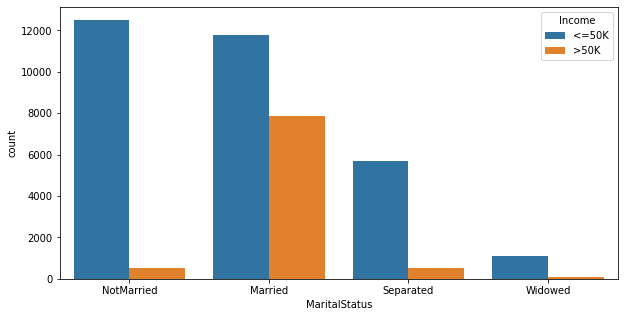

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(x="MaritalStatus",hue='Income', data=data)

Occupation

In [ ]:
data.Occupation.value_counts()

 Craft-repair         4779
 Prof-specialty       4583
 Exec-managerial      4477
 Adm-clerical         4360
 Sales                4202
 Other-service        3795
 Machine-op-inspct    2355
 ?                    2193
 Transport-moving     1786
 Handlers-cleaners    1610
 Farming-fishing      1143
 Tech-support         1134
 Protective-serv       760
 Priv-house-serv       183
 Armed-Forces           13
Name: Occupation, dtype: int64

In [ ]:
data['Occupation'] = data['Occupation'].str.strip() # Removing White Noise 

In [ ]:
data.loc[data.Occupation=='?',['Occupation']]=np.NaN # Replacing ? with NaN values

In [ ]:
data['Occupation'].fillna("Craft-repair",inplace=True)

In [ ]:
data.Occupation.value_counts()

Craft-repair         9681
Prof-specialty       4583
Exec-managerial      4477
Adm-clerical         4360
Sales                4202
Other-service        3795
Machine-op-inspct    2355
Transport-moving     1786
Handlers-cleaners    1610
Farming-fishing      1143
Tech-support         1134
Protective-serv       760
Priv-house-serv       183
Armed-Forces           13
Name: Occupation, dtype: int64

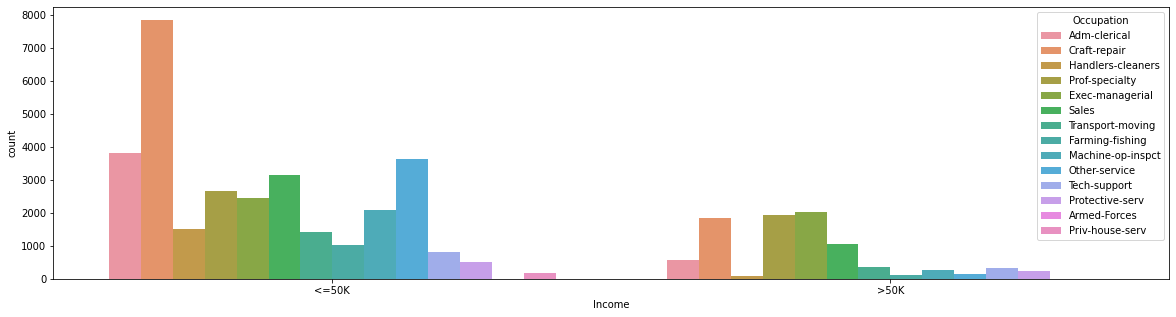

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x="Income",hue='Occupation', data=data)

Relationship

In [ ]:
data.isnull().sum()

Age                 0
WorkClass           0
fnlwgt              0
Education           0
EducationNum        0
MaritalStatus       0
Occupation          0
Relationship     2766
Gender           2676
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry    2676
Income              0
dtype: int64

In [ ]:
data.Relationship.value_counts()

 Husband           14823
 Not-in-family      9730
 Own-child          5943
 Unmarried          3910
 Wife               1732
 Other-relative     1178
Name: Relationship, dtype: int64

In [ ]:
data.Relationship.fillna('Husband',inplace=True)

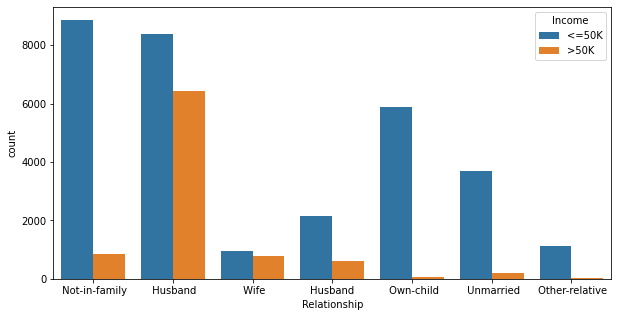

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(x='Relationship',hue='Income',data=data)

In [ ]:
data.isnull().sum()

Age                 0
WorkClass           0
fnlwgt              0
Education           0
EducationNum        0
MaritalStatus       0
Occupation          0
Relationship        0
Gender           2676
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry    2676
Income              0
dtype: int64

Gender

In [ ]:
data.Gender.value_counts()

 Male      24864
 Female    12542
Name: Gender, dtype: int64

In [ ]:
 data['Gender'] = data['Gender'].str.strip() # Removed white noice in Gender

In [ ]:
data.Gender.fillna("Male",inplace=True)

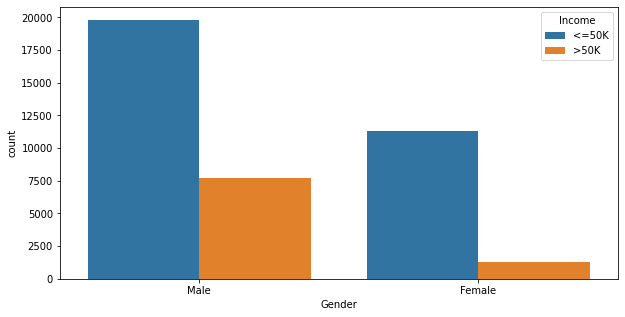

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(x="Gender",hue="Income",data=data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40082 entries, 0 to 40934
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            40082 non-null  float64
 1   WorkClass      40082 non-null  object 
 2   fnlwgt         40082 non-null  float64
 3   Education      40082 non-null  object 
 4   EducationNum   40082 non-null  float64
 5   MaritalStatus  40082 non-null  object 
 6   Occupation     40082 non-null  object 
 7   Relationship   40082 non-null  object 
 8   Gender         40082 non-null  object 
 9   CapitalGain    40082 non-null  float64
 10  CapitalLoss    40082 non-null  float64
 11  HoursPerWeek   40082 non-null  float64
 12  NativeCountry  37406 non-null  object 
 13  Income         40082 non-null  object 
dtypes: float64(6), object(8)
memory usage: 5.8+ MB


NativeCountry

In [ ]:
data.NativeCountry.value_counts()

 United-States                 33539
 Mexico                          740
 ?                               647
 Philippines                     228
 Germany                         148
 Puerto-Rico                     143
 Canada                          138
 India                           124
 El-Salvador                     117
 Cuba                            107
 China                           103
 England                          95
 Jamaica                          83
 Italy                            83
 Dominican-Republic               82
 South                            78
 Japan                            73
 Vietnam                          72
 Poland                           69
 Guatemala                        65
 Columbia                         64
 Haiti                            57
 Portugal                         54
 Taiwan                           52
 Iran                             43
 Nicaragua                        40
 Greece                           38
 

In [ ]:
data['NativeCountry'] = data['NativeCountry'].str.strip() 

In [ ]:
type(data['NativeCountry'])

pandas.core.series.Series

In [ ]:
data.loc[data["NativeCountry"]=='?',['NativeCountry']]=np.NaN

In [ ]:
data.NativeCountry.value_counts()

United-States                 33539
Mexico                          740
Philippines                     228
Germany                         148
Puerto-Rico                     143
Canada                          138
India                           124
El-Salvador                     117
Cuba                            107
China                           103
England                          95
Italy                            83
Jamaica                          83
Dominican-Republic               82
South                            78
Japan                            73
Vietnam                          72
Poland                           69
Guatemala                        65
Columbia                         64
Haiti                            57
Portugal                         54
Taiwan                           52
Iran                             43
Nicaragua                        40
Greece                           38
Peru                             36
Ireland                     

In [ ]:
data.NativeCountry.fillna("United-States", inplace= True)

In [ ]:
data.isnull().sum() # removed all null values

Age              0
WorkClass        0
fnlwgt           0
Education        0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Gender           0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
Income           0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40082 entries, 0 to 40934
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            40082 non-null  float64
 1   WorkClass      40082 non-null  object 
 2   fnlwgt         40082 non-null  float64
 3   Education      40082 non-null  object 
 4   EducationNum   40082 non-null  float64
 5   MaritalStatus  40082 non-null  object 
 6   Occupation     40082 non-null  object 
 7   Relationship   40082 non-null  object 
 8   Gender         40082 non-null  object 
 9   CapitalGain    40082 non-null  float64
 10  CapitalLoss    40082 non-null  float64
 11  HoursPerWeek   40082 non-null  float64
 12  NativeCountry  40082 non-null  object 
 13  Income         40082 non-null  object 
dtypes: float64(6), object(8)
memory usage: 5.8+ MB


Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder() # Converting Catagorical values to Numerical

In [ ]:
for feature in features_categorical:
  print(feature)
  data[feature]=l.fit_transform(data[feature])

WorkClass
Education
MaritalStatus
Occupation
Relationship
Gender
NativeCountry
Income


In [ ]:
data.shape

(40082, 14)

In [ ]:
data.Income.value_counts()

0    31084
1     8998
Name: Income, dtype: int64

In [ ]:
temp=data.copy()

In [ ]:
temp['Income'].value_counts()

0    31084
1     8998
Name: Income, dtype: int64

In [ ]:
type(data['Income'])

pandas.core.series.Series

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40082 entries, 0 to 40934
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            40082 non-null  float64
 1   WorkClass      40082 non-null  int64  
 2   fnlwgt         40082 non-null  float64
 3   Education      40082 non-null  int64  
 4   EducationNum   40082 non-null  float64
 5   MaritalStatus  40082 non-null  int64  
 6   Occupation     40082 non-null  int64  
 7   Relationship   40082 non-null  int64  
 8   Gender         40082 non-null  int64  
 9   CapitalGain    40082 non-null  float64
 10  CapitalLoss    40082 non-null  float64
 11  HoursPerWeek   40082 non-null  float64
 12  NativeCountry  40082 non-null  int64  
 13  Income         40082 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 5.8 MB


In [ ]:
data['Income'].astype(str).str.strip()

0        0
1        0
2        0
3        0
4        0
        ..
40930    0
40931    0
40932    0
40933    0
40934    1
Name: Income, Length: 40082, dtype: object

In [ ]:
data['Income'].value_counts().sum()

40082

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40082 entries, 0 to 40934
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            40082 non-null  float64
 1   WorkClass      40082 non-null  int64  
 2   fnlwgt         40082 non-null  float64
 3   Education      40082 non-null  int64  
 4   EducationNum   40082 non-null  float64
 5   MaritalStatus  40082 non-null  int64  
 6   Occupation     40082 non-null  int64  
 7   Relationship   40082 non-null  int64  
 8   Gender         40082 non-null  int64  
 9   CapitalGain    40082 non-null  float64
 10  CapitalLoss    40082 non-null  float64
 11  HoursPerWeek   40082 non-null  float64
 12  NativeCountry  40082 non-null  int64  
 13  Income         40082 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 5.8 MB


In [ ]:
from sklearn.preprocessing import minmax_scale


In [ ]:
data.fnlwgt=minmax_scale(data.fnlwgt)
data.CapitalGain=minmax_scale(data.CapitalGain)
data.CapitalLoss=minmax_scale(data.CapitalLoss)

In [ ]:
data

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39.0,6,0.082886,0,13.0,1,0,1,1,0.186162,0.000000,40.0,38,0
1,50.0,5,0.090250,0,13.0,0,2,0,1,0.000000,0.000000,13.0,38,0
2,38.0,3,0.258402,3,9.0,2,5,1,1,0.000000,0.000000,40.0,38,0
3,53.0,3,0.225566,3,7.0,0,5,0,1,0.000000,0.020325,40.0,38,0
4,28.0,3,0.414391,0,13.0,0,9,5,1,0.000000,0.000000,40.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40930,39.0,3,0.258113,0,13.0,2,9,1,0,0.000000,0.000000,36.0,38,0
40931,64.0,3,0.392782,3,9.0,3,2,2,1,0.000000,0.000000,40.0,38,0
40932,38.0,3,0.460864,0,13.0,0,9,0,1,0.000000,0.000000,50.0,38,0
40933,44.0,3,0.090986,0,13.0,2,0,3,1,0.467118,0.000000,40.0,38,0


In [ ]:
data.corr()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
Age,1.000000,0.035806,-0.076785,0.067672,0.013224,-0.007450,-0.006926,-0.193571,0.074820,0.090518,0.055884,0.066434,-0.002799,0.209905
WorkClass,0.035806,1.000000,-0.028965,0.009775,0.002833,-0.050247,0.012333,-0.044184,0.064689,-0.009554,0.004389,0.037489,-0.008998,-0.011085
fnlwgt,-0.076785,-0.028965,1.000000,0.017658,-0.041030,0.000881,-0.004958,0.005783,0.027959,-0.002939,-0.002381,-0.011453,-0.058393,-0.007184
Education,0.067672,0.009775,0.017658,1.000000,-0.579785,0.029417,-0.014914,0.021611,0.034029,-0.039415,-0.026584,-0.058597,-0.077500,-0.131997
EducationNum,0.013224,0.002833,-0.041030,-0.579785,1.000000,-0.075833,0.095852,-0.065272,-0.002299,0.077186,0.085083,0.121180,0.088553,0.299655
MaritalStatus,-0.007450,-0.050247,0.000881,0.029417,-0.075833,1.000000,-0.033237,0.320469,-0.408242,-0.081011,-0.054164,-0.147950,0.014345,-0.340879
Occupation,-0.006926,0.012333,-0.004958,-0.014914,0.095852,-0.033237,1.000000,-0.047699,0.054724,0.011500,0.018307,0.049639,0.001974,0.063880
Relationship,-0.193571,-0.044184,0.005783,0.021611,-0.065272,0.320469,-0.047699,1.000000,-0.418876,-0.063571,-0.044780,-0.184958,-0.001789,-0.197148
Gender,0.074820,0.064689,0.027959,0.034029,-0.002299,-0.408242,0.054724,-0.418876,1.000000,0.053427,0.042200,0.208379,-0.006153,0.201114
CapitalGain,0.090518,-0.009554,-0.002939,-0.039415,0.077186,-0.081011,0.011500,-0.063571,0.053427,1.000000,-0.046099,0.051169,0.013369,0.233291


In [ ]:
np.isnan(data.values.any())  # To check if there are any null values

False

**Modelling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [ ]:
x=data.iloc[:,:-1]
x

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry
0,39.0,6,0.082886,0,13.0,1,0,1,1,0.186162,0.000000,40.0,38
1,50.0,5,0.090250,0,13.0,0,2,0,1,0.000000,0.000000,13.0,38
2,38.0,3,0.258402,3,9.0,2,5,1,1,0.000000,0.000000,40.0,38
3,53.0,3,0.225566,3,7.0,0,5,0,1,0.000000,0.020325,40.0,38
4,28.0,3,0.414391,0,13.0,0,9,5,1,0.000000,0.000000,40.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40930,39.0,3,0.258113,0,13.0,2,9,1,0,0.000000,0.000000,36.0,38
40931,64.0,3,0.392782,3,9.0,3,2,2,1,0.000000,0.000000,40.0,38
40932,38.0,3,0.460864,0,13.0,0,9,0,1,0.000000,0.000000,50.0,38
40933,44.0,3,0.090986,0,13.0,2,0,3,1,0.467118,0.000000,40.0,38


In [ ]:
y=data.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
40930    0
40931    0
40932    0
40933    0
40934    1
Name: Income, Length: 40082, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40082 entries, 0 to 40934
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            40082 non-null  float64
 1   WorkClass      40082 non-null  int64  
 2   fnlwgt         40082 non-null  float64
 3   Education      40082 non-null  int64  
 4   EducationNum   40082 non-null  float64
 5   MaritalStatus  40082 non-null  int64  
 6   Occupation     40082 non-null  int64  
 7   Relationship   40082 non-null  int64  
 8   Gender         40082 non-null  int64  
 9   CapitalGain    40082 non-null  float64
 10  CapitalLoss    40082 non-null  float64
 11  HoursPerWeek   40082 non-null  float64
 12  NativeCountry  40082 non-null  int64  
 13  Income         40082 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 5.8 MB


In [ ]:
lgr_model=lgr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
y_predict=lgr_model.predict(x_test)

In [ ]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_predict,y_test)

0.812523387800923

In [ ]:
confusion_matrix(y_test,y_predict)

array([[5800,  409],
       [1094,  714]])

**Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40082 entries, 0 to 40934
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            40082 non-null  float64
 1   WorkClass      40082 non-null  int64  
 2   fnlwgt         40082 non-null  float64
 3   Education      40082 non-null  int64  
 4   EducationNum   40082 non-null  float64
 5   MaritalStatus  40082 non-null  int64  
 6   Occupation     40082 non-null  int64  
 7   Relationship   40082 non-null  int64  
 8   Gender         40082 non-null  int64  
 9   CapitalGain    40082 non-null  float64
 10  CapitalLoss    40082 non-null  float64
 11  HoursPerWeek   40082 non-null  float64
 12  NativeCountry  40082 non-null  int64  
 13  Income         40082 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 5.8 MB


In [ ]:
x=data.loc[:,['Age','WorkClass','Education','MaritalStatus','Occupation','Relationship','Gender','NativeCountry','fnlwgt',"CapitalGain",'HoursPerWeek','CapitalLoss']]
y=data.loc[:,['Income']]

In [ ]:
y

,Income
0,0
1,0
2,0
3,0
4,0
...,...
40930,0
40931,0
40932,0
40933,0


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
ypredict=dtc.predict(xtest)

In [ ]:
accuracy_score(ypredict,ytest)

0.7901958338530622

In [ ]:
confusion_matrix(y_test,y_predict)

array([[5800,  409],
       [1094,  714]])

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=100,oob_score=True,n_jobs=1,random_state=20)

In [ ]:
rf.fit(xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=True, random_state=20, verbose=0,
                       warm_start=False)

In [ ]:
ypredict=rf.predict(xtest)

In [ ]:
accuracy_score(ypredict,ytest)

0.8445802669327679

In [ ]:
confusion_matrix(ytest,ypredict)

array([[5757,  452],
       [ 794, 1014]])

**SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(kernel='rbf',C=1,gamma=1)

In [ ]:
svc.fit(xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
ypredict=svc.predict(xtest)

In [ ]:
accuracy_score(ytest,ypredict)

0.7956841711363353

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn=KNeighborsClassifier(n_neighbors=6)

In [ ]:
kn.fit(xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
ypredict=kn.predict(xtest)

In [ ]:
accuracy_score(ypredict,ytest)

0.802794062616939

In [ ]:
confusion_matrix(ytest,ypredict)

array([[5784,  425],
       [1156,  652]])